In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
marketing_df = pd.read_csv('Marketing_data.csv')
df = marketing_df.copy()
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
# MINIMUM_PAYMENTS ile CREDIT_LIMIT degiskeninde eksik deger var sadece.
# CUST_ID'yi silebiliriz.

In [6]:
df.drop('CUST_ID',axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [7]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [8]:
# Eksik degerleri inceleyelim.
df[df['CREDIT_LIMIT'].isnull()]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


In [9]:
# 6 yil boyunca islem yapmamasi ve degerlerin cogunun 0 olmasi sebebiyle bu satiri siliyorum.
df.drop(df[df['CREDIT_LIMIT'].isnull()].index,axis=0,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8949 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8949 non-null   float64
 1   BALANCE_FREQUENCY                 8949 non-null   float64
 2   PURCHASES                         8949 non-null   float64
 3   ONEOFF_PURCHASES                  8949 non-null   float64
 4   INSTALLMENTS_PURCHASES            8949 non-null   float64
 5   CASH_ADVANCE                      8949 non-null   float64
 6   PURCHASES_FREQUENCY               8949 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8949 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8949 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8949 non-null   float64
 10  CASH_ADVANCE_TRX                  8949 non-null   int64  
 11  PURCHASES_TRX                     8949 non-null   int64  
 12  CREDIT

In [10]:
df[df['MINIMUM_PAYMENTS'].isnull()].head(50)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12
45,2242.311686,1.000000,437.00,97.00,340.00,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0,12
47,3910.111237,1.000000,0.00,0.00,0.00,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0,12
54,6.660517,0.636364,310.00,0.00,310.00,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
55,1311.995984,1.000000,1283.90,1283.90,0.00,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0,12
56,3625.218146,1.000000,313.27,313.27,0.00,668.468743,0.250000,0.250000,0.000000,0.416667,5,4,4000.0,0.000000,NaN,0.0,12
63,7.152356,0.090909,840.00,840.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1600.0,0.000000,NaN,0.0,12
93,1307.717841,1.000000,405.60,405.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,2,2400.0,0.000000,NaN,0.0,12
94,2329.485768,1.000000,213.34,213.34,0.00,0.000000,0.250000,0.250000,0.000000,0.000000,0,3,2400.0,0.000000,NaN,0.0,12
97,3505.671311,1.000000,0.00,0.00,0.00,1713.984305,0.000000,0.000000,0.000000,0.500000,6,0,4000.0,0.000000,NaN,0.0,12


In [11]:
# Yukaridaki ciktiyi inceledigimde kullanici odeme yuzdesi 0 olan degerlerin minimum odemesinin NAN oldugunu farkettim. 
# Odeme yuzdesi 0 ise zaten hic odeme yapmamis demektir. Bu yuzden eksik degerleri 0 ile dolduracagim.
df['MINIMUM_PAYMENTS'].fillna(0,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8949 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8949 non-null   float64
 1   BALANCE_FREQUENCY                 8949 non-null   float64
 2   PURCHASES                         8949 non-null   float64
 3   ONEOFF_PURCHASES                  8949 non-null   float64
 4   INSTALLMENTS_PURCHASES            8949 non-null   float64
 5   CASH_ADVANCE                      8949 non-null   float64
 6   PURCHASES_FREQUENCY               8949 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8949 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8949 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8949 non-null   float64
 10  CASH_ADVANCE_TRX                  8949 non-null   int64  
 11  PURCHASES_TRX                     8949 non-null   int64  
 12  CREDIT

In [12]:
# Simdi her bir degiskenin dagilimlarina bakalim.

C:\Users\dnz1p\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dnz1p\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dnz1p\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

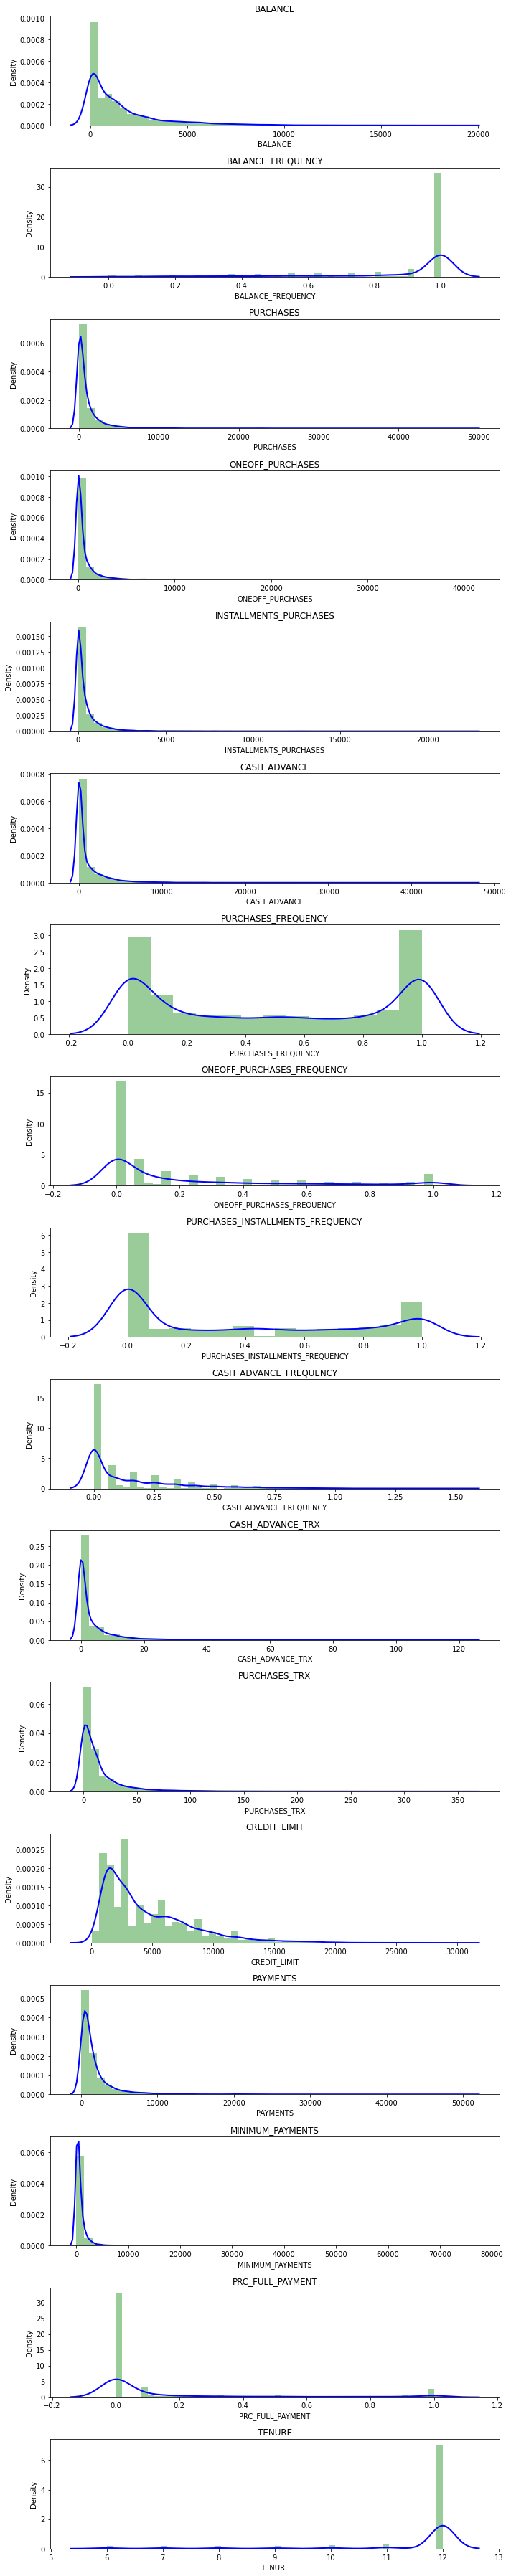

In [13]:
plt.figure(figsize=(10,50))
for i in range(len(df.columns)):
  plt.subplot(17, 1, i+1)
  sns.distplot(df[df.columns[i]], kde_kws={"color": "b", "lw": 2, "label": "KDE"}, hist_kws={"color": "g"})
  plt.title(df.columns[i])

plt.tight_layout()

<AxesSubplot:>

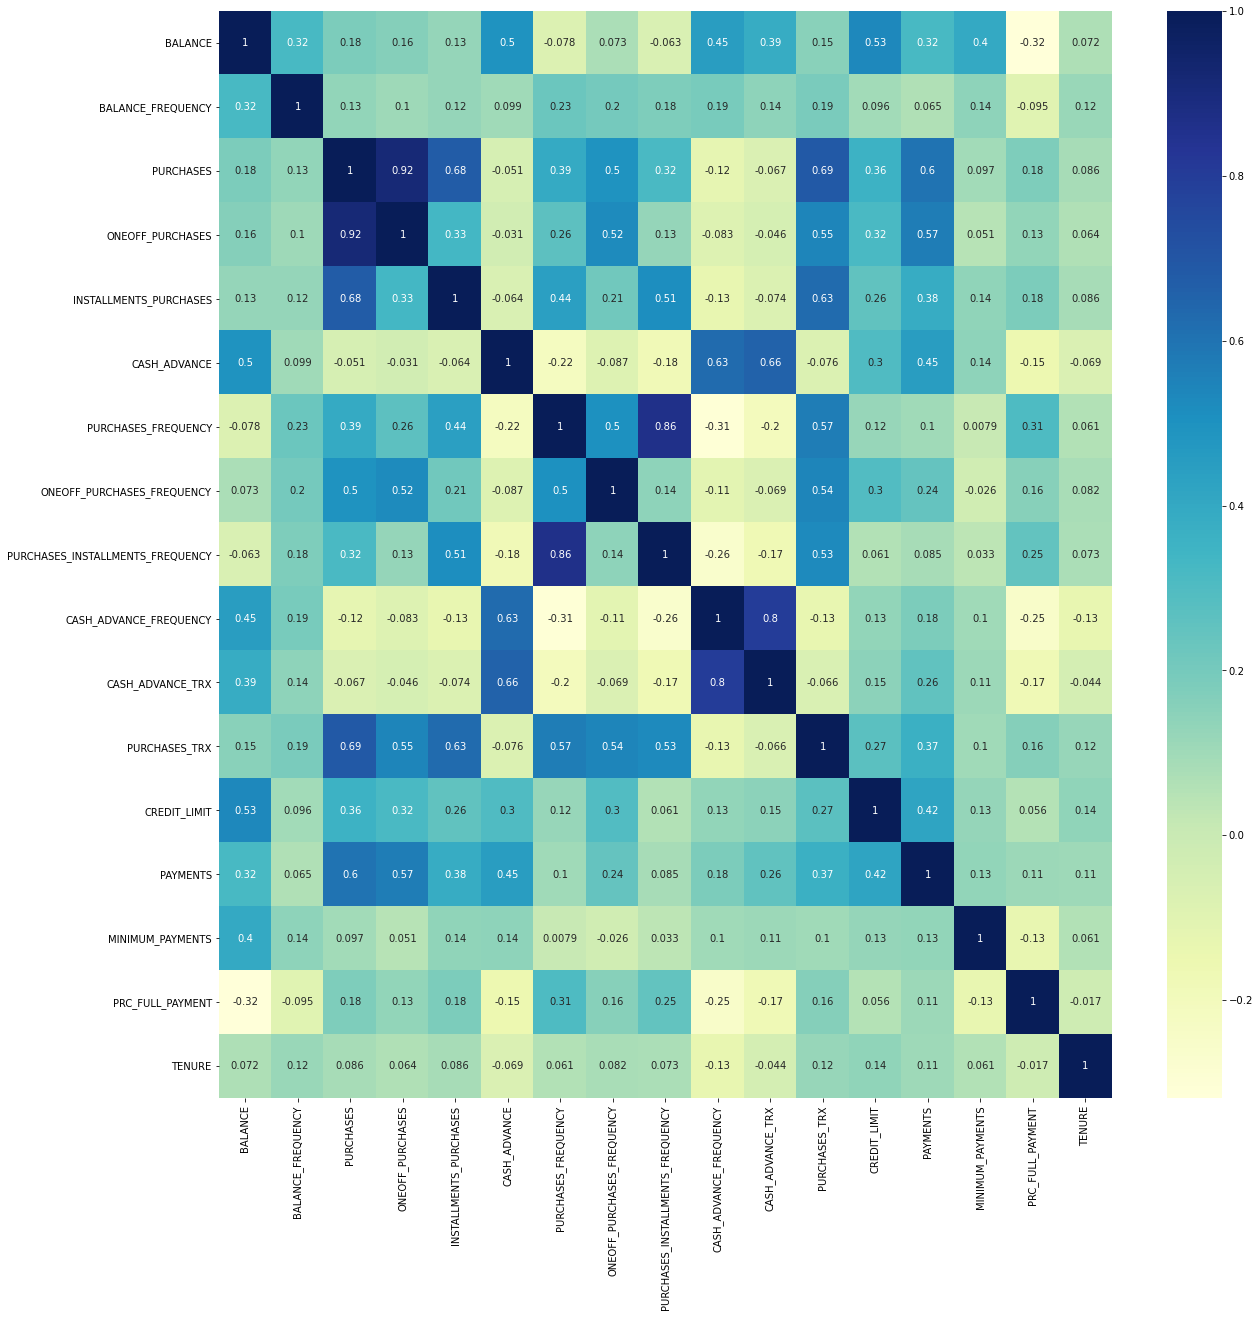

In [14]:
correlations = df.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True, cmap="YlGnBu")

In [15]:
df.loc[:,['PURCHASES','ONEOFF_PURCHASES','PURCHASES_TRX']].head(20)

,PURCHASES,ONEOFF_PURCHASES,PURCHASES_TRX
0,95.40,0.00,2
1,0.00,0.00,0
2,773.17,773.17,12
3,1499.00,1499.00,1
4,16.00,16.00,1
5,1333.28,0.00,8
6,7091.01,6402.63,64
7,436.20,0.00,12
8,861.49,661.49,5
9,1281.60,1281.60,3


In [16]:
# Benzer bilgiyi tasiyan bazi degiskenler var. Ayrica bazi degerler mantikli durmuyor. 
#Mesela musteri satin alma gerceklestirmis olmasina ragmen tek seferde yapilan maksimum satin alma tutari 0 olarak gorunuyor. 
# Verisetinde duzeltilmesi gereken cok fazla yer var fakat bu yazimda kmeans ile musteri segmentasyonu uzerinde durmak istiyorum.

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled.shape

(8949, 17)

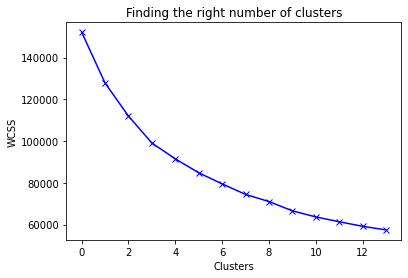

In [18]:
from sklearn.cluster import KMeans

wcss = []

range_values = range(1,15)

for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(df_scaled)
  wcss.append(kmeans.inertia_) 

plt.plot(wcss, 'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('WCSS') 
plt.show()

In [19]:
# Optimum kume sayimizin 6-10 arasinda oldugunu soyleyebilirim.
# Simdilik 6 kume oldugunu varsayip gorsellestirme de yaparak inceleyelim.

In [38]:
kmeans = KMeans(6, random_state=0)
kmeans.fit(df_scaled)
labels = kmeans.labels_
kmeans.cluster_centers_.shape

(6, 17)

In [39]:
df_ = scaler.inverse_transform(df_scaled)
df_ = pd.DataFrame(data= df_, columns = df.columns)
df_.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,2.018021e+02,139.509787,0.000000,12.0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4.103033e+03,1072.340217,0.222222,12.0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,6.220667e+02,627.284787,0.000000,12.0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,-2.273737e-13,0.000000,0.000000,12.0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,6.783348e+02,244.791237,0.000000,12.0


In [40]:
df_cluster = pd.concat([df_, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,2.018021e+02,139.509787,0.000000,12.0,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4.103033e+03,1072.340217,0.222222,12.0,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,6.220667e+02,627.284787,0.000000,12.0,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,-2.273737e-13,0.000000,0.000000,12.0,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,6.783348e+02,244.791237,0.000000,12.0,2


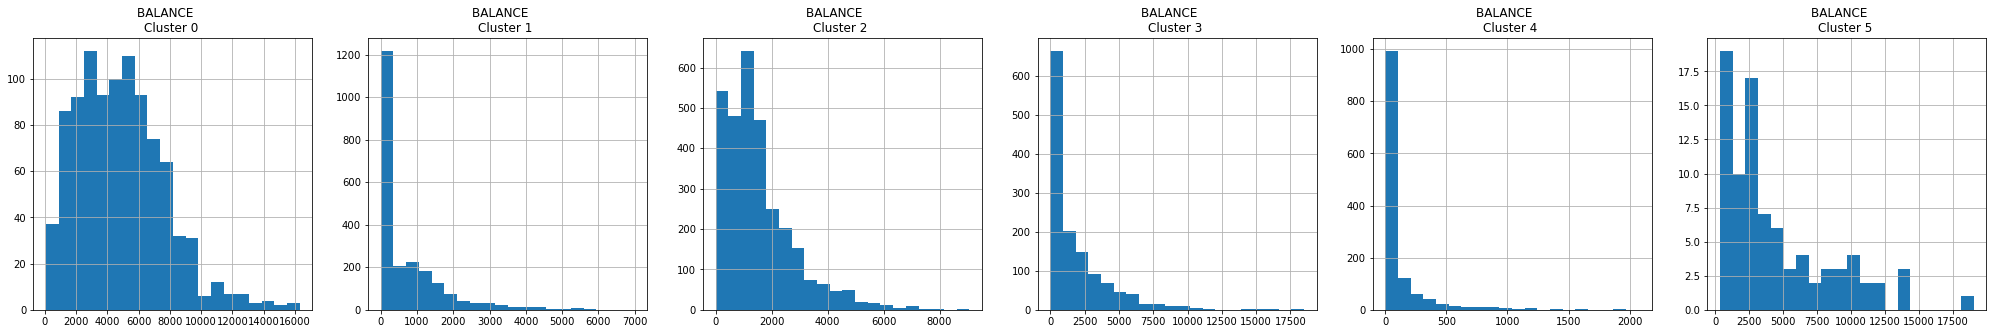

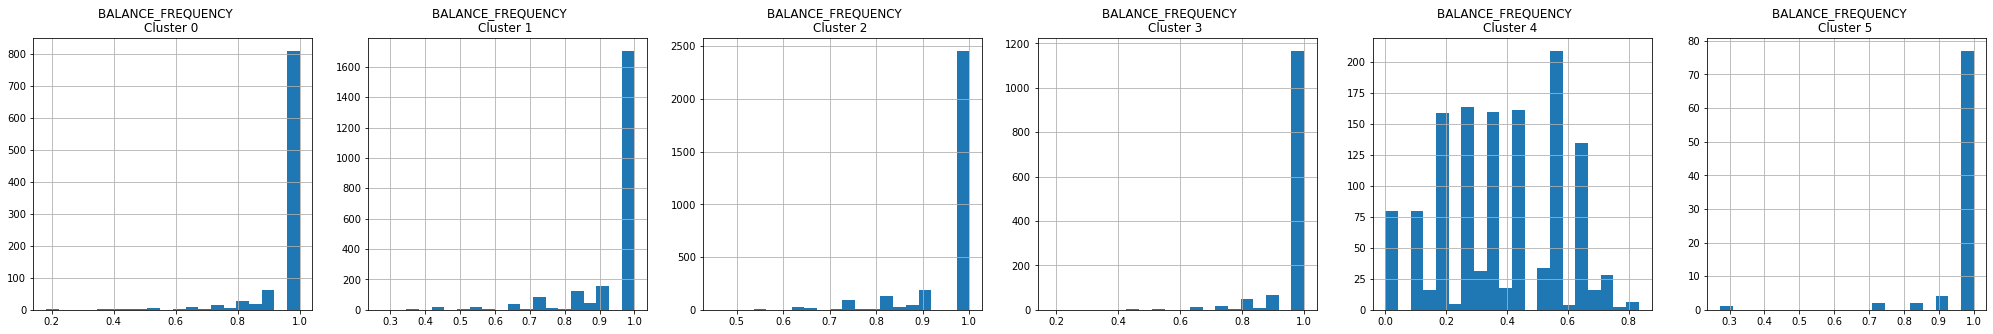

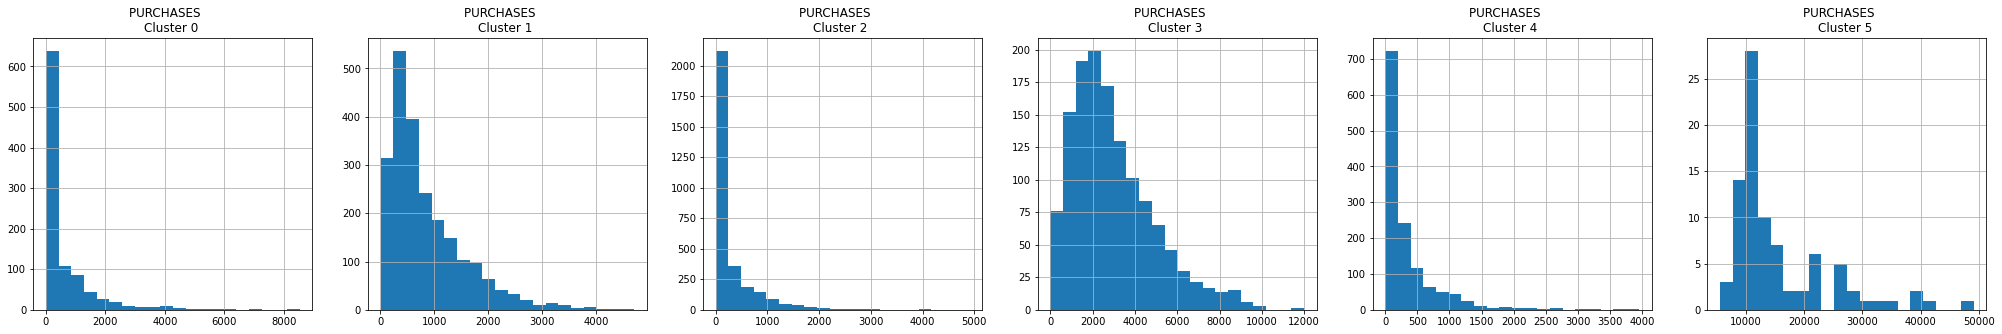

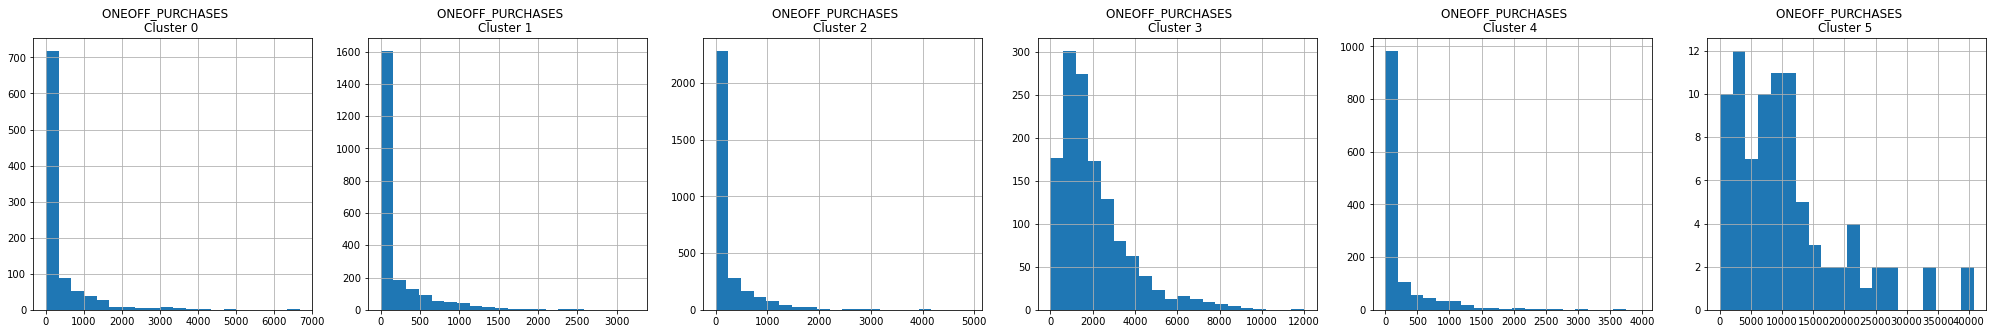

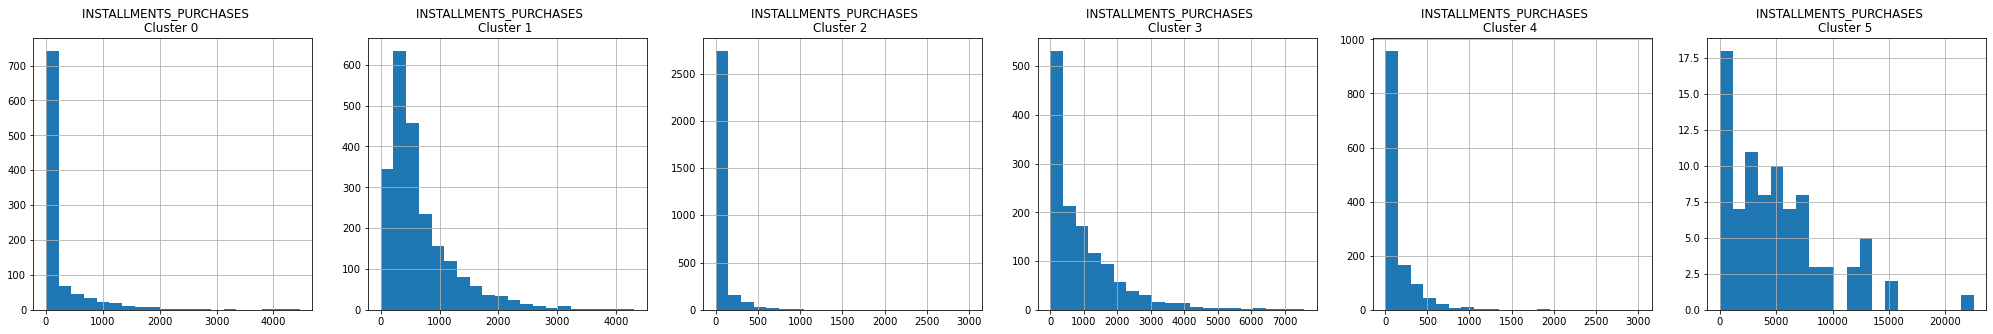

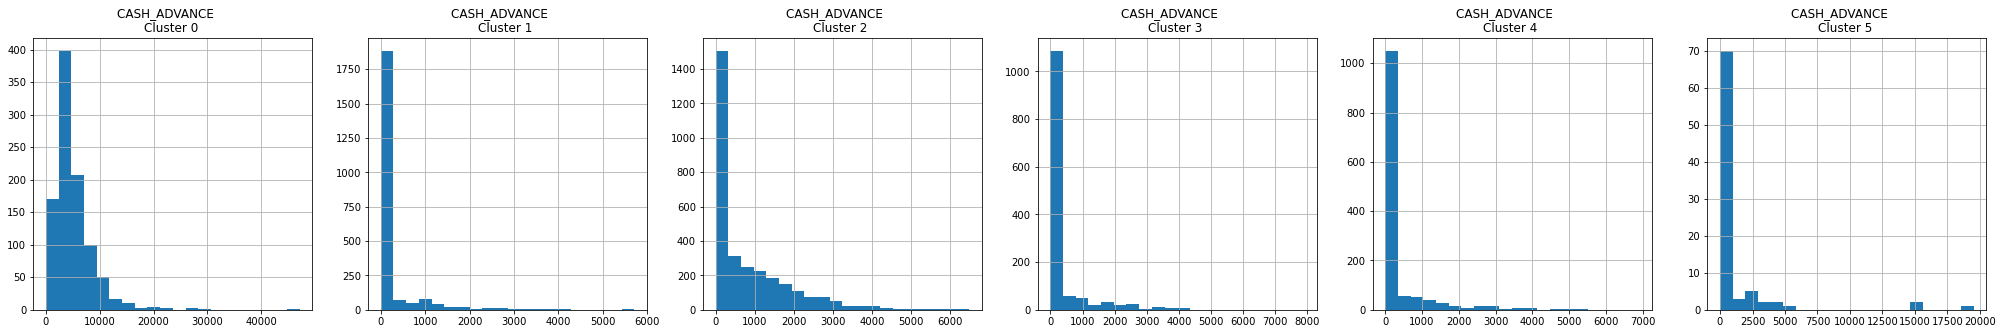

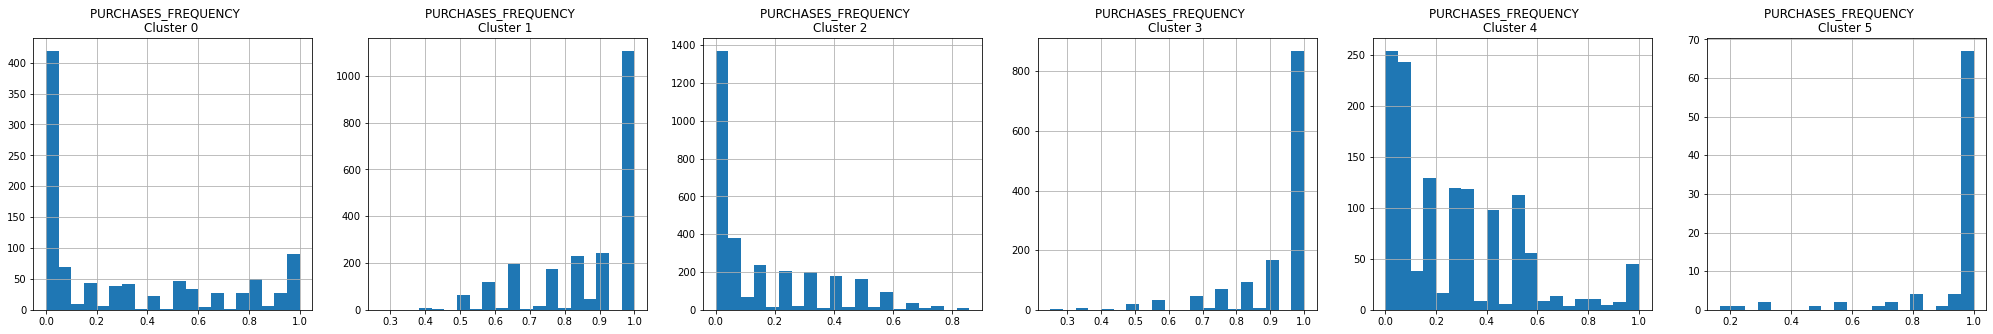

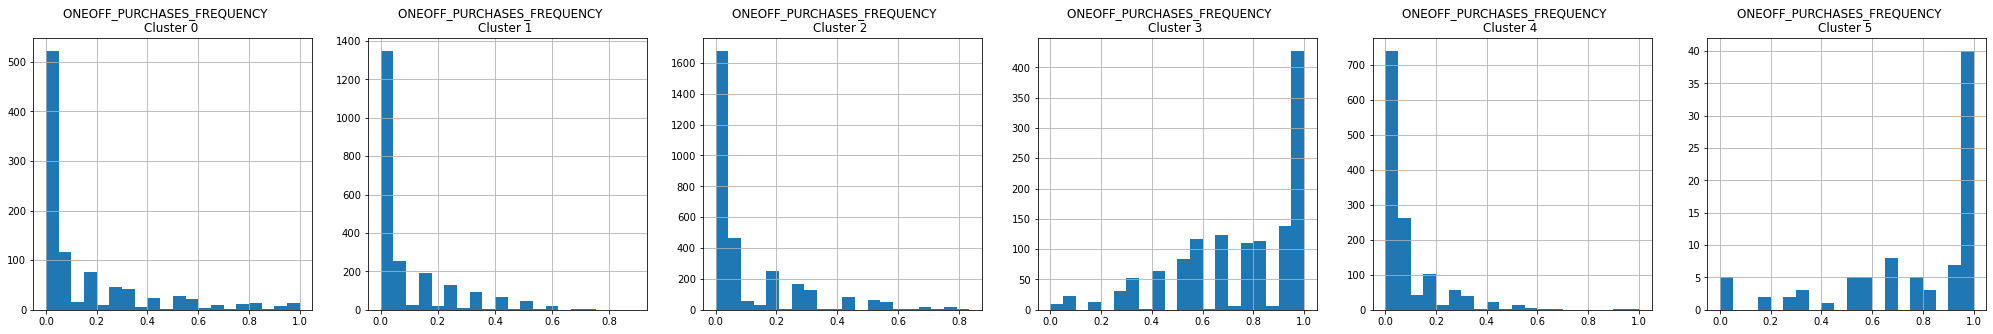

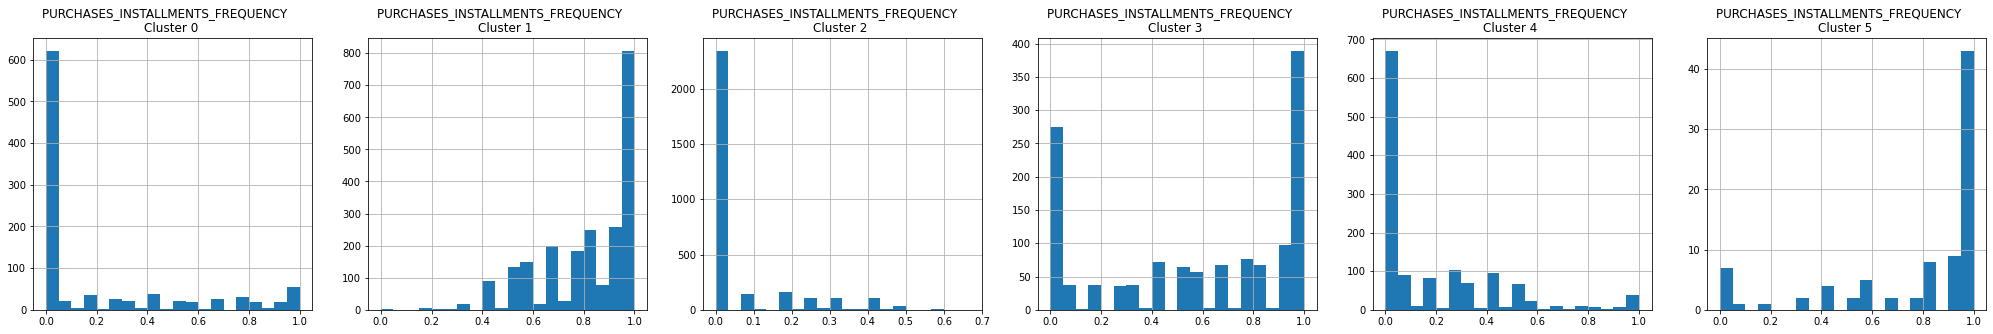

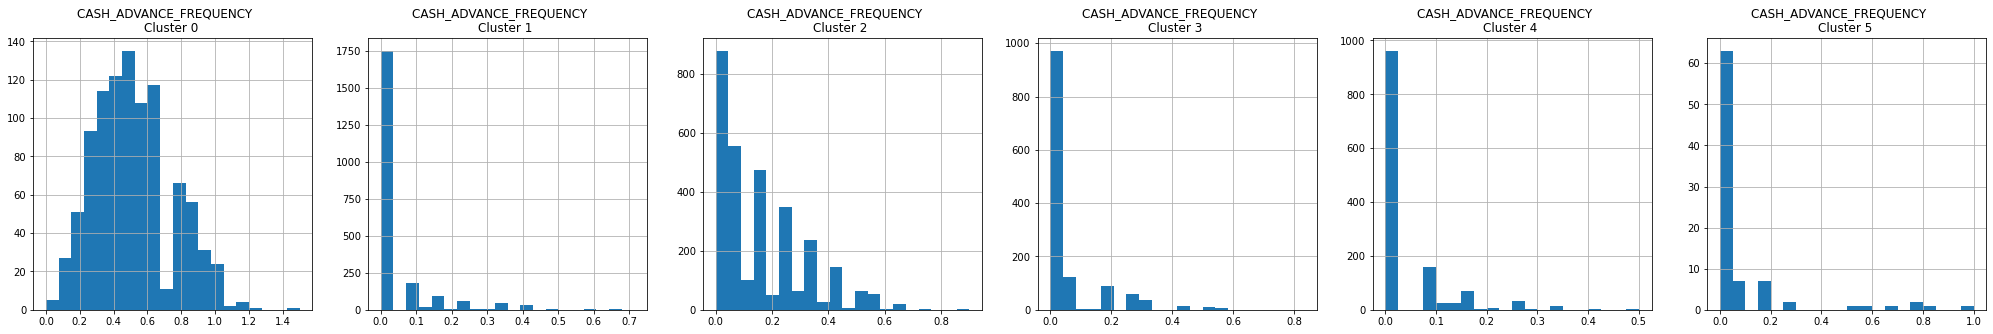

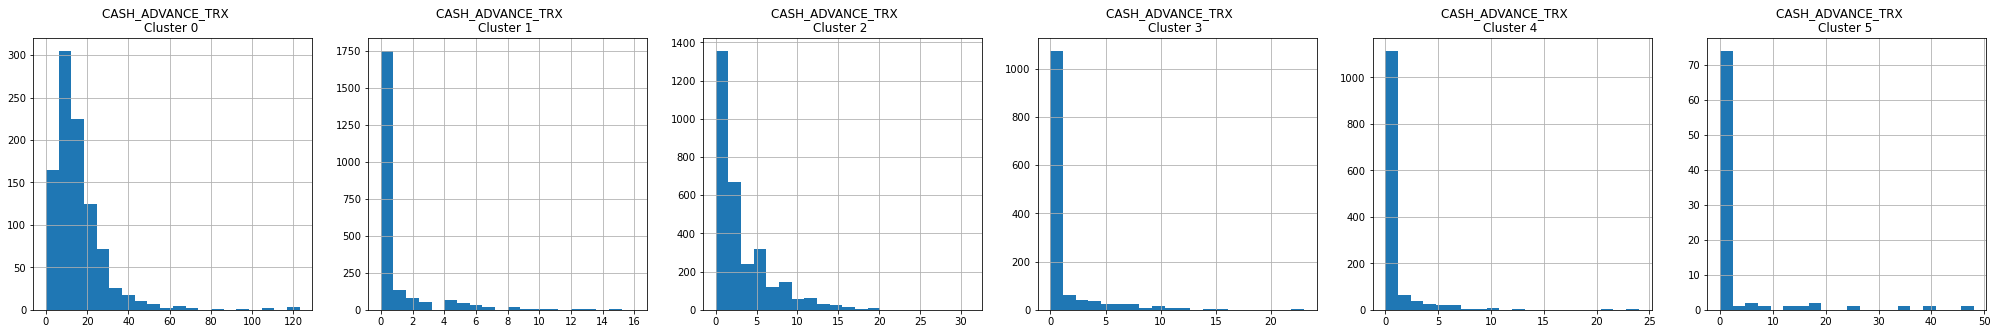

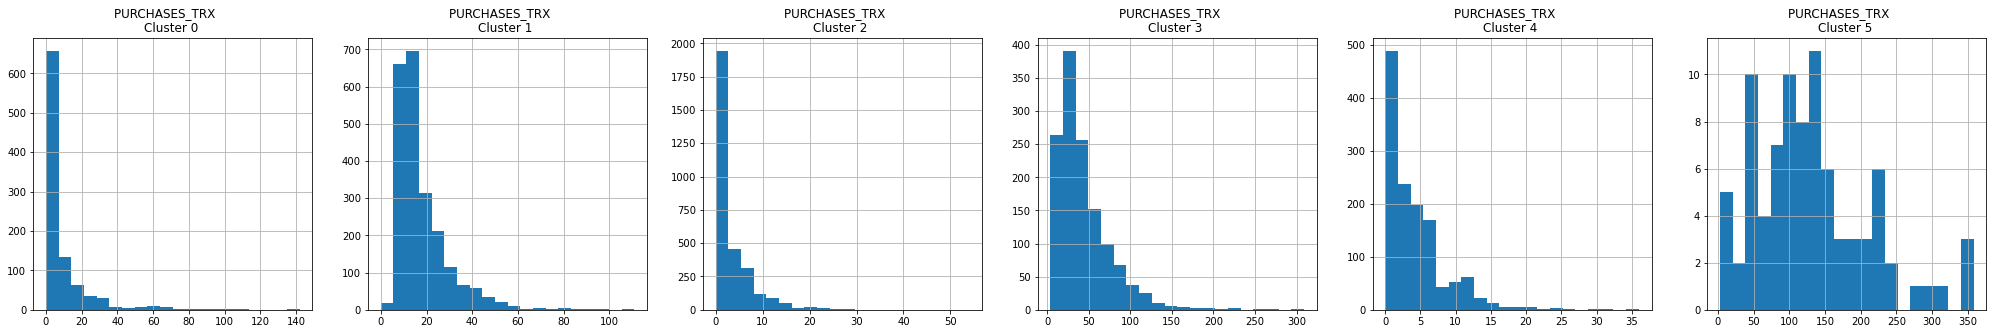

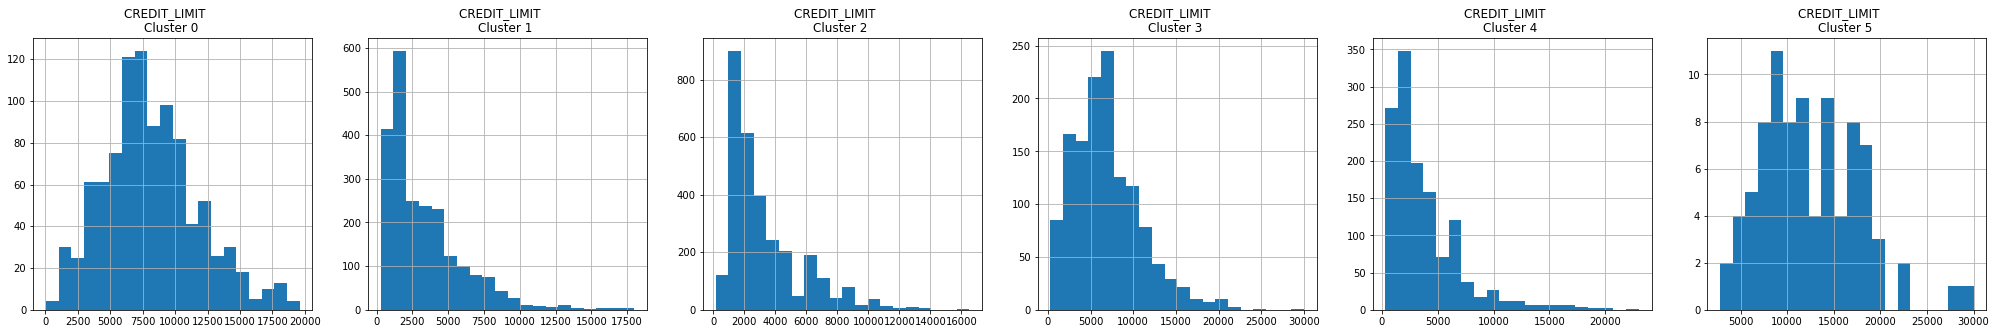

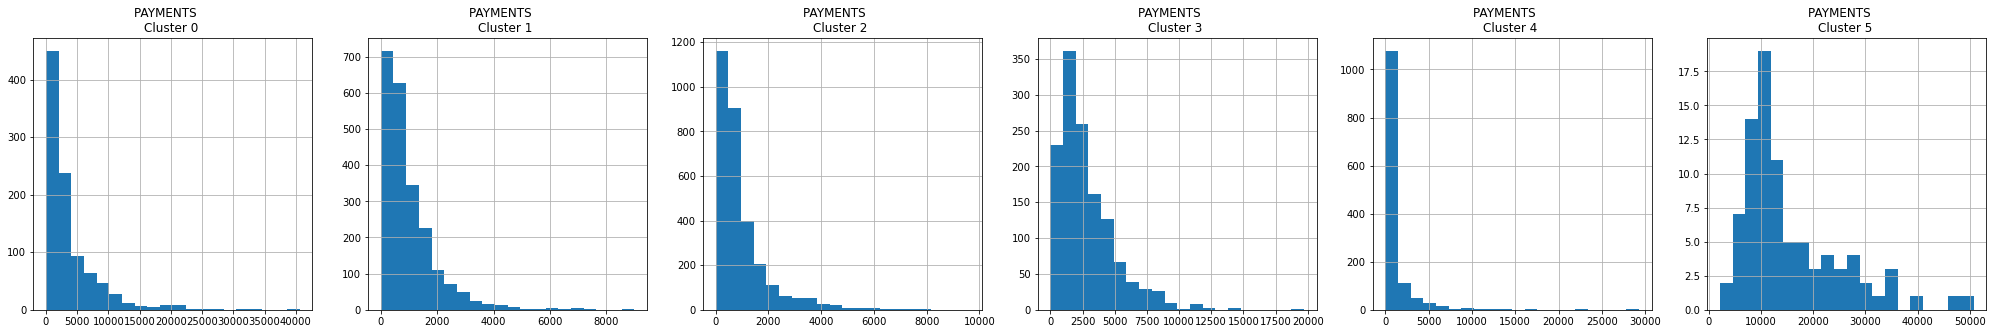

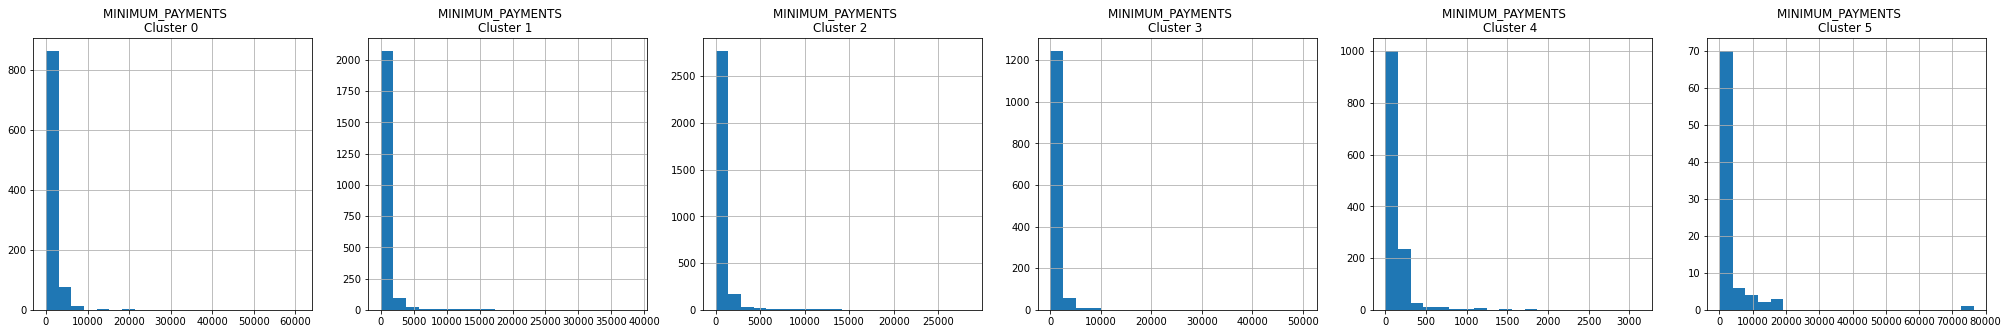

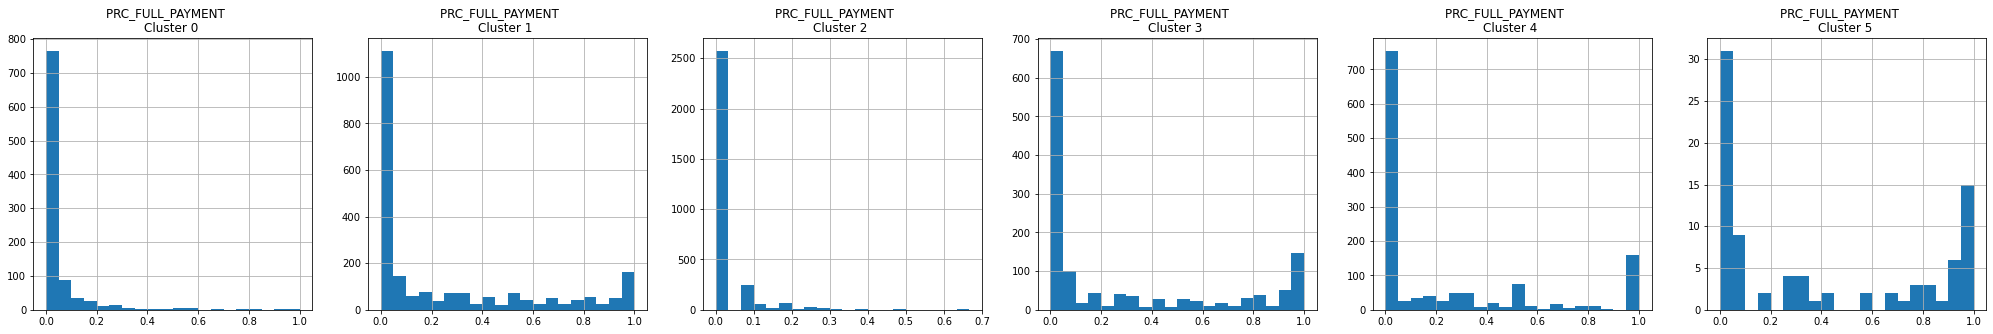

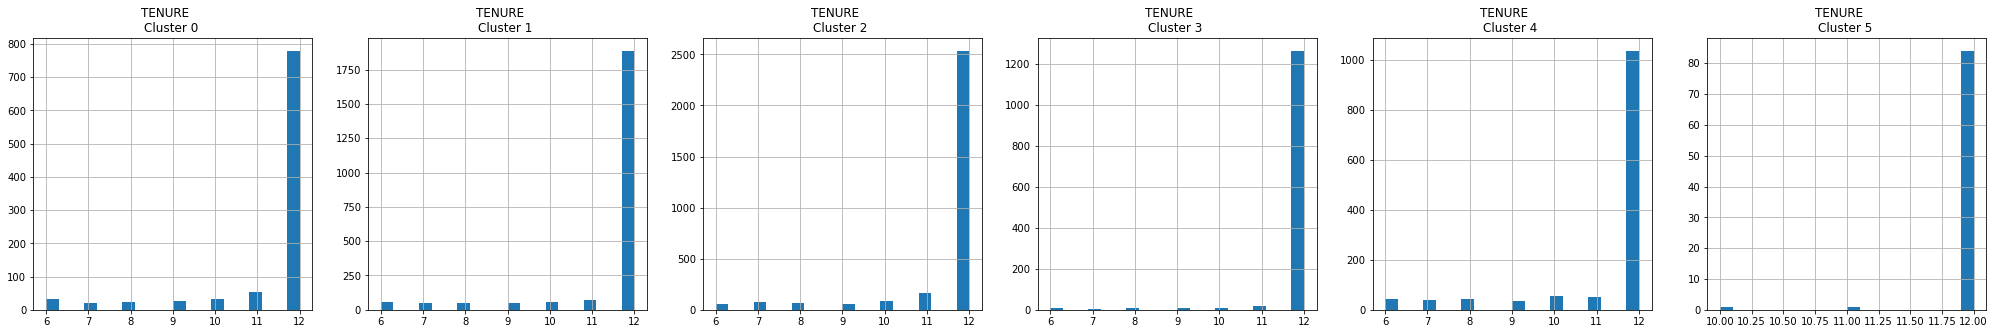

In [41]:
for i in df_.columns:
  plt.figure(figsize = (35, 5))
  for j in range(6):
    plt.subplot(1,6,j+1)
    cluster = df_cluster[df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()

In [24]:
# Simdi kumelerimizin ozellikleriyle ilgili bilgi toplayalim.

In [42]:
df_cluster[df_cluster['cluster']==0].describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
count,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,968.000000,9.680000e+02,968.000000,968.000000,968.000000,968.0
mean,4880.272348,0.966637,556.110961,341.286033,214.929959,5051.507613,0.307249,0.146055,0.200648,0.513566,15.811983,8.462810,7997.783621,3.954235e+03,2051.178015,0.039069,11.395661,0.0
std,2835.741479,0.094156,974.123419,699.203538,490.072270,3799.904917,0.363509,0.232683,0.324017,0.230737,13.160523,15.507101,3707.567431,4.718425e+03,3970.428868,0.110653,1.472766,0.0
min,78.114579,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,-2.273737e-13,0.000000,0.000000,6.000000,0.0
25%,2710.283722,1.000000,0.000000,0.000000,0.000000,2773.328377,0.000000,0.000000,0.000000,0.333333,8.000000,0.000000,5500.000000,1.324000e+03,796.428167,0.000000,12.000000,0.0
50%,4657.639065,1.000000,117.865000,0.000000,0.000000,4159.854885,0.090909,0.000000,0.000000,0.500000,13.000000,2.000000,7500.000000,2.197614e+03,1403.428568,0.000000,12.000000,0.0
75%,6634.639437,1.000000,718.585000,352.425000,183.000000,6188.139604,0.583333,0.181818,0.333333,0.666667,20.000000,11.000000,10000.000000,4.787489e+03,2146.686923,0.000000,12.000000,0.0
max,16304.889250,1.000000,8533.540000,6678.260000,4460.780000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,142.000000,19600.000000,4.062760e+04,61031.618600,1.000000,12.000000,0.0


In [43]:
df_cluster[df_cluster['cluster']==1].describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
count,2226.000000,2226.000000,2226.000000,2226.000000,2226.000000,2226.000000,2226.000000,2226.000000,2226.000000,2226.000000,2226.000000,2226.000000,2226.000000,2.226000e+03,2226.000000,2226.000000,2226.000000,2226.0
mean,737.232404,0.950443,856.817049,184.207866,673.145247,211.939517,0.877586,0.089609,0.817384,0.042426,0.805031,17.713836,3293.180684,1.003197e+03,729.927081,0.253631,11.482480,1.0
std,1016.917712,0.109672,701.374175,364.248518,588.644066,609.536998,0.153133,0.143875,0.191817,0.101222,2.088318,11.919858,2640.646285,9.868185e+02,2182.444880,0.342304,1.405258,0.0
min,0.734665,0.272727,12.000000,0.000000,0.000000,0.000000,0.272727,0.000000,0.000000,0.000000,0.000000,0.000000,300.000000,-2.273737e-13,0.000000,0.000000,6.000000,1.0
25%,62.989400,1.000000,346.340000,0.000000,280.062500,0.000000,0.750000,0.000000,0.666667,0.000000,0.000000,11.000000,1500.000000,3.619241e+02,151.937049,0.000000,12.000000,1.0
50%,258.493067,1.000000,619.175000,0.000000,485.025000,0.000000,0.916667,0.000000,0.875000,0.000000,0.000000,13.000000,2500.000000,6.990582e+02,185.902605,0.083333,12.000000,1.0
75%,1090.812245,1.000000,1178.510000,211.525000,862.180000,0.000000,1.000000,0.166667,1.000000,0.000000,0.000000,22.000000,4500.000000,1.323082e+03,541.328109,0.454545,12.000000,1.0
max,6991.964344,1.000000,4709.140000,3227.850000,4313.220000,5716.149236,1.000000,0.888889,1.000000,0.714286,16.000000,111.000000,18000.000000,9.000707e+03,38512.124770,1.000000,12.000000,1.0


In [44]:
df_cluster[df_cluster['cluster']==2].describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
count,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3038.000000,3.038000e+03,3038.000000,3038.000000,3038.000000,3038.0
mean,1533.798448,0.965172,266.229355,221.563799,44.828453,802.595220,0.159135,0.102589,0.058357,0.161187,3.050033,3.020408,3272.964670,9.742649e+02,772.927621,0.021823,11.504937,2.0
std,1257.649259,0.082151,474.530850,449.029135,135.435665,1040.550946,0.198109,0.161127,0.124053,0.157431,3.534411,4.833505,2452.015892,1.073420e+03,1696.914137,0.062745,1.332631,0.0
min,0.488050,0.454545,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,-2.273737e-13,0.000000,0.000000,6.000000,2.0
25%,660.415525,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1500.000000,3.410245e+02,227.147568,0.000000,12.000000,2.0
50%,1218.626608,1.000000,48.010000,0.000000,0.000000,342.518731,0.083333,0.000000,0.000000,0.125000,2.000000,1.000000,2500.000000,6.104520e+02,413.145100,0.000000,12.000000,2.0
75%,2027.044718,1.000000,341.977500,241.837500,0.000000,1272.938240,0.272727,0.166667,0.000000,0.250000,5.000000,5.000000,4387.500000,1.164734e+03,725.605373,0.000000,12.000000,2.0
max,9061.317491,1.000000,4900.000000,4900.000000,3000.000000,6479.639793,0.857143,0.833333,0.666667,0.900000,31.000000,54.000000,16500.000000,9.614698e+03,28483.254830,0.666667,12.000000,2.0


In [45]:
df_cluster[df_cluster['cluster']==3].describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
count,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1.323000e+03,1323.000000,1323.000000,1323.000000,1323.0
mean,1844.768881,0.978060,2969.873537,2037.514029,932.813023,327.419775,0.926960,0.750027,0.580518,0.053839,1.066515,44.026455,6987.488490,2.811531e+03,792.589670,0.280637,11.880574,3.0
std,2254.701508,0.073576,1949.504820,1645.804790,1104.360334,832.919362,0.130722,0.253232,0.392457,0.112576,2.559451,33.000918,4033.994536,2.216852e+03,1911.355984,0.376634,0.664152,0.0
min,1.198223,0.181818,8.400000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,4.000000,300.000000,-2.273737e-13,0.000000,0.000000,6.000000,3.0
25%,289.304660,1.000000,1512.480000,872.450000,103.795000,0.000000,0.916667,0.583333,0.166667,0.000000,0.000000,22.000000,4000.000000,1.254463e+03,182.485675,0.000000,12.000000,3.0
50%,910.821412,1.000000,2537.670000,1590.580000,600.000000,0.000000,1.000000,0.833333,0.666667,0.000000,0.000000,35.000000,6500.000000,2.200939e+03,284.024015,0.000000,12.000000,3.0
75%,2577.320747,1.000000,4019.795000,2678.810000,1372.655000,92.031875,1.000000,1.000000,1.000000,0.083333,1.000000,55.000000,9000.000000,3.825540e+03,853.517181,0.583333,12.000000,3.0
max,18495.558550,1.000000,11994.710000,11994.710000,7571.400000,7894.578816,1.000000,1.000000,1.000000,0.833333,23.000000,309.000000,30000.000000,1.971410e+04,50260.759470,1.000000,12.000000,3.0


In [46]:
df_cluster[df_cluster['cluster']==4].describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
count,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1.308000e+03,1308.000000,1308.000000,1308.000000,1308.0
mean,111.605165,0.374509,335.089335,209.407194,125.909052,333.666534,0.266113,0.077651,0.180021,0.037884,0.798165,4.136086,3735.657068,1.094290e+03,126.961077,0.230748,11.302752,4.0
std,230.579416,0.195572,481.747100,449.987306,234.605455,844.135495,0.252053,0.126121,0.251347,0.074950,2.199102,4.535145,3203.737350,2.334687e+03,193.383255,0.346769,1.578381,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,300.000000,-2.273737e-13,0.000000,0.000000,6.000000,4.0
25%,7.089387,0.200000,37.725000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1500.000000,1.520572e+02,37.812816,0.000000,12.000000,4.0
50%,25.687217,0.363636,158.820000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,3.000000,3000.000000,3.825387e+02,94.433673,0.000000,12.000000,4.0
75%,94.491489,0.545455,426.997500,194.675000,165.930000,79.635294,0.416667,0.083333,0.333333,0.083333,1.000000,6.000000,5000.000000,1.037106e+03,150.230479,0.363636,12.000000,4.0
max,2075.637866,0.833333,3950.000000,3950.000000,3011.360000,6897.966615,1.000000,1.000000,1.000000,0.500000,24.000000,36.000000,23000.000000,2.927249e+04,3116.679110,1.000000,12.000000,4.0


In [47]:
df_cluster[df_cluster['cluster']==5].describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.0
mean,4541.393882,0.976638,15777.311395,10689.027791,5088.283605,1060.190695,0.928101,0.763090,0.781501,0.085271,2.988372,130.197674,12493.023256,15581.496801,3383.304083,0.394721,11.965116,5.0
std,3918.343503,0.092778,8721.569456,8982.914509,4378.951420,3191.679741,0.177680,0.303423,0.319788,0.205710,8.634397,79.693356,5293.476356,9646.696712,8866.689365,0.413776,0.239984,0.0
min,348.342172,0.272727,5596.110000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,3.000000,2800.000000,2190.466875,156.683560,0.000000,10.000000,5.0
25%,1403.918288,1.000000,10285.232500,4049.062500,1606.422500,0.000000,1.000000,0.583333,0.604166,0.000000,0.000000,79.000000,9000.000000,9323.955560,342.448619,0.000000,12.000000,5.0
50%,3060.286157,1.000000,11779.945000,9425.015000,4205.970000,0.000000,1.000000,0.916667,0.958334,0.000000,0.000000,121.500000,12000.000000,12037.309790,837.674493,0.250000,12.000000,5.0
75%,6594.376439,1.000000,19802.442500,12917.802500,6977.167500,172.019759,1.000000,1.000000,1.000000,0.083333,1.000000,174.000000,16375.000000,19970.794488,2676.310503,0.864583,12.000000,5.0
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,19513.474830,1.000000,1.000000,1.000000,1.000000,48.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000,5.0


In [48]:
df_cluster.groupby('cluster').mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
0,4880.272348,0.966637,556.110961,341.286033,214.929959,5051.507613,0.307249,0.146055,0.200648,0.513566,15.811983,8.462810,7997.783621,3954.234520,2051.178015,0.039069,11.395661
1,737.232404,0.950443,856.817049,184.207866,673.145247,211.939517,0.877586,0.089609,0.817384,0.042426,0.805031,17.713836,3293.180684,1003.197118,729.927081,0.253631,11.482480
2,1533.798448,0.965172,266.229355,221.563799,44.828453,802.595220,0.159135,0.102589,0.058357,0.161187,3.050033,3.020408,3272.964670,974.264913,772.927621,0.021823,11.504937
3,1844.768881,0.978060,2969.873537,2037.514029,932.813023,327.419775,0.926960,0.750027,0.580518,0.053839,1.066515,44.026455,6987.488490,2811.531103,792.589670,0.280637,11.880574
4,111.605165,0.374509,335.089335,209.407194,125.909052,333.666534,0.266113,0.077651,0.180021,0.037884,0.798165,4.136086,3735.657068,1094.290104,126.961077,0.230748,11.302752
5,4541.393882,0.976638,15777.311395,10689.027791,5088.283605,1060.190695,0.928101,0.763090,0.781501,0.085271,2.988372,130.197674,12493.023256,15581.496801,3383.304083,0.394721,11.965116


In [32]:
# cluster 4;
# bakiye ortalamasi dusuk ama az da olsa harcama yapiyor. Asiriya kacmamis alisverislerinde, temkinli davranan musteri segmenti.
# cluster 1;
# genelde taksitli alisverisi tercih etmis, bakiyesini devamli guncellemekte, duzenli alisveris yapmakta olan musteri segmenti
# cluster 5;
# sik sik korkusuzca alisveris yapan, kredi limiti en yuksek olan, sirket icin en onemli musteri segmenti diyebiliriz
# cluster 2;
# bu grup ta az ama oz alisveris yapanlari iceren bir grup, cok alisveris yapmiyorlar fakat yaptiklarinda da genelde nakit odeme gerceklestiriyorlar.
# cluster 0;
# ortalama bakiyesi en fazla olan, nakit odeme konusunda en basarili musteri segmenti
# cluster 3;
# bakiyesini surekli guncelleyen, yine korkusuzca alisveris yapan, kredi limiti yuksek olan musteri segmenti.

In [ ]:
# Bu bilgiler isiginda, diger kumelerin 5.kumeye nasil yakinlastirilabilecegi dusunulmelidir. 
# veya ornegin bakiyesi ve nakit odemesi iyi olmasina ragmen alisveris miktari az olan 0 kumesi neden az alisveris yapiyor bu sorunun yaniti aranmalidir.

In [ ]:
# https://www.kaggle.com/arjunbhasin2013/ccdata
# https://www.udemy.com/share/102X3U2@Pm5jbF5bSl0JcEFEO2JnfT5t/